In [1]:
import numpy as np
import os
import shutil

import matplotlib.pyplot as plt
from matplotlib import animation

from PIL import Image
import subprocess

In [3]:
def fourier(t, C):
    return sum(C.real[k] * np.cos(k * t) + C.imag[k] * np.sin(k * t) for k in range(len(C)))

def elephant(t, p):
    Cx, Cy = np.zeros(6, dtype='complex'), np.zeros(6, dtype='complex')
    Cx[1], Cx[2], Cx[3], Cx[5] = p[0].real * 1j, p[1].real * 1j, p[2].real, p[3].real
    Cy[1], Cy[2], Cy[3] = p[3].imag + p[0].imag * 1j, p[1].imag * 1j, p[2].imag * 1j
    x = np.append(fourier(t, Cy), [p[4].imag])
    y = -np.append(fourier(t, Cx), [-p[4].imag])
    return x, y

In [5]:
params = [
    50 - 30j, 
    18 + 8j, 
    12 - 10j, 
    -14 - 60j, 
    20 + 20j
]

## Elephant Drawing

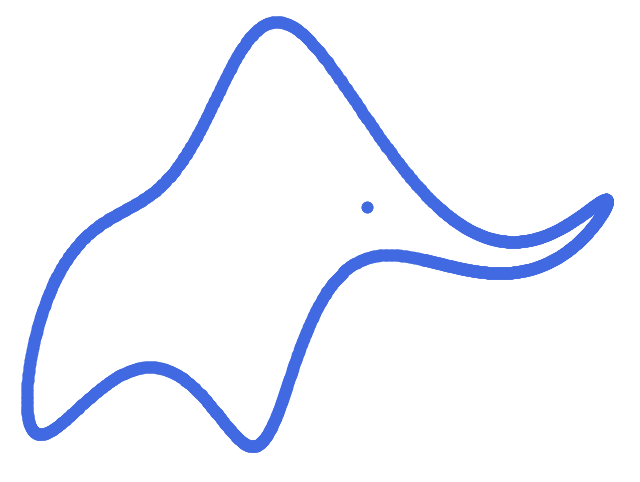

In [8]:
t_body = np.linspace(0.4 + 1.3*np.pi, 2*np.pi + 0.9*np.pi, 1000)
x_body, y_body = elephant(t_body, params)
t_trunk = np.linspace(2*np.pi + 0.9*np.pi, 0.4 + 3.3*np.pi, 1000)
x_trunk, y_trunk = elephant(t_trunk, params)

plt.figure(figsize=(8, 6))
plt.plot(x_body, y_body, '.', color='royalblue', markersize=15)
plt.plot(x_trunk, y_trunk, '.', color='royalblue', markersize=15)
plt.xlim([-75, 90])
plt.ylim([-70, 87])
plt.axis('off')
plt.savefig('Elephant.png', dpi=144, transparent=True)
plt.show()

In [10]:
x_all = np.concatenate([x_body, x_trunk])
y_all = np.concatenate([y_body, y_trunk])

path = "Elephant"
if os.path.exists(path):
    shutil.rmtree(path)
os.makedirs(path)

n_frames = 60 - 1
step = len(x_all) // n_frames
if step == 0:
    step = 1

for i, idx in enumerate(range(step, len(x_all) + 1, step), 1):
    plt.figure(figsize=(8, 6))
    plt.plot(x_all[:idx], y_all[:idx], '.', color='royalblue', markersize=15)
    plt.xlim([-75, 90])
    plt.ylim([-70, 87])
    plt.axis('off')
    plt.savefig(os.path.join(path, f'Elephant_{i:03d}.png'), dpi=144, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.close()

plt.figure(figsize=(8, 6))
plt.plot(x_all, y_all, '.', color='royalblue', markersize=15)
plt.xlim([-75, 90])
plt.ylim([-70, 87])
plt.axis('off')
plt.savefig(os.path.join(path, 'Elephant_060.png'), dpi=144, bbox_inches='tight', pad_inches=0, transparent=True)
plt.close()

### GIF

In [13]:
image_folder = "Elephant"
png_files = sorted([os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.png')])
frames = []
for png_file in png_files:
    img = Image.open(png_file).convert("RGBA")
    alpha = img.getchannel("A")
    imgP = img.convert("RGB").convert("P", palette=Image.ADAPTIVE, colors=256, dither=Image.NONE)
    transparency = 255
    for x in range(imgP.width):
        for y in range(imgP.height):
            if alpha.getpixel((x, y)) == 0:
                transparency = imgP.getpixel((x, y))
                break
        if transparency != 255:
            break
    frames.append(imgP)
frames[0].save('Elephant_Drawing.gif', save_all=True, append_images=frames[1:], duration=1, loop=0, transparency=transparency, disposal=2, optimize=False)

### MOV

In [16]:
image_folder = "Elephant"
output_mov = "Elephant_Drawing.mov"
cmd = ["ffmpeg", "-y", "-framerate", "15", "-i", os.path.join(image_folder, "Elephant_%03d.png"), "-c:v", "prores_ks", "-profile:v", "4", "-pix_fmt", "yuva444p10le", output_mov]
subprocess.run(cmd, check=True)

FileNotFoundError: [Errno 2] No such file or directory: 'ffmpeg'

## Elephant Trunk

In [19]:
path = "ElephantTrunk_Wiggle"
if os.path.exists(path):
    shutil.rmtree(path)
os.makedirs(path)

t_body = np.linspace(0.4 + 1.3 * np.pi, 2 * np.pi + 0.9 * np.pi, 1000)
x_body, y_body = elephant(t_body, params)

t_trunk = np.linspace(2 * np.pi + 0.9 * np.pi, 0.4 + 3.3 * np.pi, 1000)
n_frames = 20
for i in range(n_frames):
    phase = 2 * np.pi * i / n_frames
    x_trunk, y_trunk = elephant(t_trunk, params)
    for j in range(len(y_trunk) - 1):
        y_trunk[j] -= np.sin(((x_trunk[j] - x_trunk[0]) * np.pi / len(y_trunk))) * np.sin(phase) * params[4].real * 3

    plt.figure(figsize=(8, 6))
    plt.plot(x_body, y_body, '.', color='royalblue', markersize=15)
    plt.plot(x_trunk, y_trunk, '.', color='royalblue', markersize=15)
    plt.xlim([-75, 90])
    plt.ylim([-70, 87])
    plt.axis('off')
    plt.savefig(os.path.join(path, f'ElephantTrunk_{i+1:03d}.png'), dpi=144, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.close()

In [20]:
image_folder = "ElephantTrunk_Wiggle"
png_files = sorted([os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.png')])
frames = []
for png_file in png_files:
    img = Image.open(png_file).convert("RGBA")
    alpha = img.getchannel("A")
    imgP = img.convert("RGB").convert("P", palette=Image.ADAPTIVE, colors=256, dither=Image.NONE)
    transparency = 255
    for x in range(imgP.width):
        for y in range(imgP.height):
            if alpha.getpixel((x, y)) == 0:
                transparency = imgP.getpixel((x, y))
                break
        if transparency != 255:
            break
    frames.append(imgP)
frames[0].save('ElephantTrunk_Wiggle.gif', save_all=True, append_images=frames[1:], duration=1, loop=0, transparency=transparency, disposal=2, optimize=False)

In [22]:
image_folder = "ElephantTrunk_Wiggle"
output_mov = "ElephantTrunk_Wiggle.mov"
cmd = ["ffmpeg", "-y", "-framerate", "15", "-i", os.path.join(image_folder, "ElephantTrunk_%03d.png"), "-c:v", "prores_ks", "-profile:v", "4", "-pix_fmt", "yuva444p10le", output_mov]
subprocess.run(cmd, check=True)

FileNotFoundError: [Errno 2] No such file or directory: 'ffmpeg'